In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, rfft, ifft, irfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt

file_path = '17_22.xlsx'

# Read the Excel file with headers in the first row
df = pd.read_excel(file_path, header=0)  # header=0 to use the first row as the header

# Ignore the 1st column (column A which contains dates)
df_subset = df.iloc[:,1:]

# Concatenate all rows into a single list and ignore values that are 0
data = df_subset.values.flatten().tolist()
n = len(data)



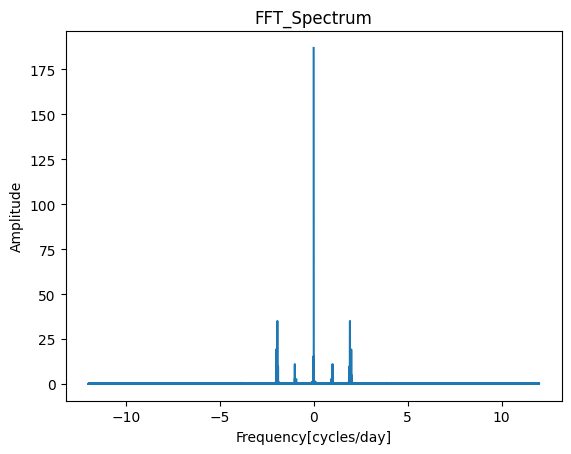

In [2]:
#Get the frequency components of the spectrum
sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
frequency_axis = fftfreq(n, d=1.0/sampling_rate)
norm_amplitude = 2/n*np.abs(fft(data))
# Plot the results
plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[cycles/day]')
plt.ylabel('Amplitude')
plt.title('FFT_Spectrum')
plt.show()

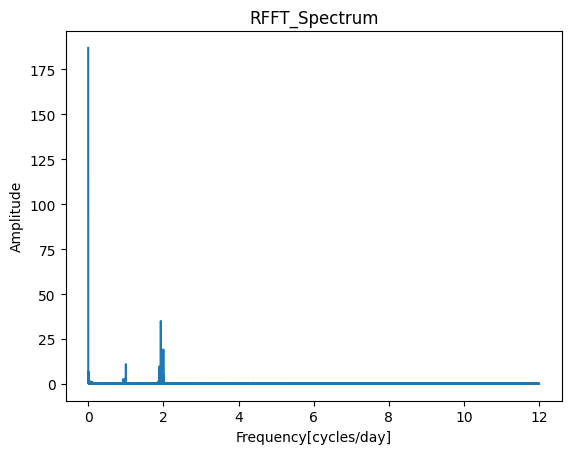

In [3]:
sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
rfft_data = rfft(data)
rfft_freq = rfftfreq(n, d=1.0/sampling_rate)
norm_rfft_amp = 2/n*np.abs(rfft(data))

# Plot the results
plt.plot(rfft_freq, norm_rfft_amp)
plt.xlabel('Frequency[cycles/day]')
plt.ylabel('Amplitude')
plt.title('RFFT_Spectrum')
plt.show()

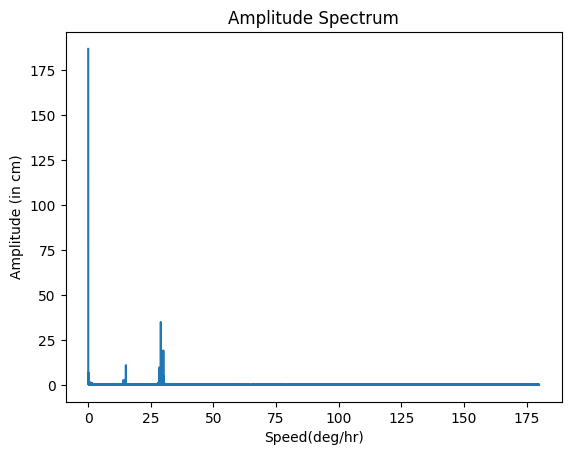

In [4]:
amparray =2/n*(np.abs(rfft(data)))
plt.plot(15*rfftfreq(n, d=1/24), 2/n*(np.abs(rfft(data))))
# amp_dict = {}
# for i in range(0,4380):
#     amp_dict[amparray[i]] = i
# amparray.sort()
# amparray = amparray[::-1]
plt.title('Amplitude Spectrum')
plt.xlabel('Speed(deg/hr)')
plt.ylabel('Amplitude (in cm)')
plt.show()

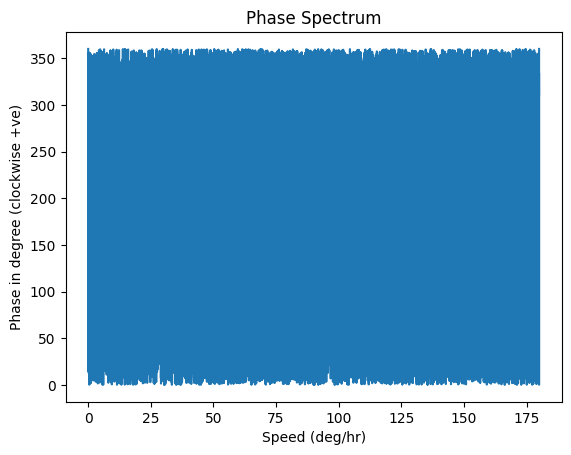

In [5]:
phasearray = np.angle(rfft(data) , deg = True)
phasearray = 360 - phasearray
phasearray[phasearray > 360] -= 360
freqarray = 15*rfftfreq(n, d=1/24)

plt.plot(15*rfftfreq(n, d=1/24), phasearray) #plot the y and sort in reverse order

plt.title('Phase Spectrum')
plt.xlabel('Speed (deg/hr)')
plt.ylabel('Phase in degree (clockwise +ve)')
plt.show()

In [6]:
import numpy as np
import pandas as pd

# Assuming rfft_data, amparray, rfft_freq, and phasearray are already defined

const_rfft_data = np.zeros(np.shape(rfft_data), dtype='complex128')  # Constructed rfft data array
top_amp = []
top_speed = []
top_phase = []

# Get indices of the top 11 amplitudes
tmp = np.argpartition(-amparray, 101)
top_indices = tmp[:101]

# Extract amplitude, speed, and phase for the top components
for i in top_indices:
    top_amp.append(amparray[i])
    top_speed.append(15 * rfft_freq[i])
    top_phase.append(phasearray[i])
    const_rfft_data[i] = rfft_data[i]

# Create a DataFrame
df = pd.DataFrame({'Amplitude': top_amp, 'Speed (degs/hour)': top_speed, 'Phase (clockwise +ve)': top_phase})

# Sort the DataFrame by Amplitude in descending order
df_sorted = df.sort_values(by='Amplitude', ascending=False)

# Write the sorted DataFrame to an Excel file
output_file = 'component_17_22_100.xlsx'
df_sorted.to_excel(output_file, index=False)

print(f'Data written to {output_file}')


Data written to component_17_22_100.xlsx
